In [26]:
import os
import sys

In [27]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from api_key import (consumer_key,
                    consumer_secret_key,
                    consumer_access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(consumer_access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [29]:
# Target User Accounts
target_user = ("BBC", "CBS", "CNN", "Fox", "NYtimes")

min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# List for dictionaries of results
result_list = []

# Loop through each user
for user in target_user:
    public_tweets = api.user_timeline(user, count=100)

    
    sentiment=[]
    counter=1
    
    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"] 
        
        sentiment.append({"username":user,
                          "compound":compound,
                          "positive":pos,
                         "negative":neg,
                         "neutral":neu,
                         "tweet_no":counter})
        counter+=1
    result_list.append(sentiment)    
    
BBC_df=pd.DataFrame(result_list[0])
CBS_df=pd.DataFrame(result_list[1])
CNN_df=pd.DataFrame(result_list[2])
Fox_df=pd.DataFrame(result_list[3])
NYtimes_df=pd.DataFrame(result_list[4])

#check DataFrame
NYtimes_df

,username,compound,positive,negative,neutral,tweet_no
0,NYtimes,0.0000,0.000,0.000,1.000,1
1,NYtimes,0.3400,0.138,0.000,0.862,2
2,NYtimes,-0.4767,0.000,0.140,0.860,3
3,NYtimes,0.2263,0.087,0.000,0.913,4
4,NYtimes,0.0000,0.000,0.000,1.000,5
...,...,...,...,...,...,...
95,NYtimes,-0.7555,0.000,0.276,0.724,96
96,NYtimes,0.0000,0.000,0.000,1.000,97
97,NYtimes,0.0000,0.000,0.000,1.000,98
98,NYtimes,0.4215,0.175,0.120,0.706,99


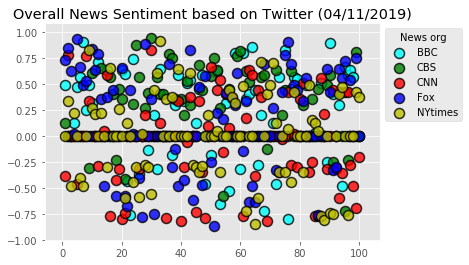

In [31]:
# Create plot
plt.scatter(BBC_df["tweet_no"],
    BBC_df["compound"], marker="o",edgecolors="black", alpha=0.8, label = "BBC", color = 'cyan',s=100,linewidth='1.5')

plt.scatter(CBS_df["tweet_no"],
    CBS_df["compound"], marker="o",edgecolors="black", alpha=0.8, label = "CBS", color = 'g',s=100, linewidth='1.5')

plt.scatter(CNN_df["tweet_no"],
    CNN_df["compound"], marker="o",edgecolors="black", alpha=0.8, label = "CNN", color = 'r',s=100, linewidth='1.5')        
    
plt.scatter(Fox_df["tweet_no"],
    Fox_df["compound"], marker="o",edgecolors="black", alpha=0.8, label = "Fox", color = 'b',s=100, linewidth='1.5')

plt.scatter(NYtimes_df["tweet_no"],
    NYtimes_df["compound"], marker="o",edgecolors="black", alpha=0.8, label = "NYtimes", color = 'y', s=100, linewidth='1.5')


plt.legend(bbox_to_anchor=(1, 1), ncol=1,loc="upper left", title="News org")

plt.title(f"Overall News Sentiment based on Twitter ({now})")
plt.savefig('scatter plot.png')
plt.show()   
    

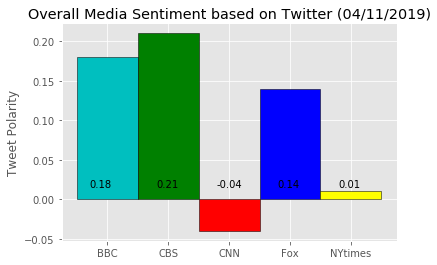

In [33]:
#calculate mean in each dataframe

BBC_mean  = round(np.mean(BBC_df['compound']),2)
CBS_mean = round(np.mean(CBS_df['compound']),2)
CNN_mean = round(np.mean(CNN_df['compound']),2)
Fox_mean = round(np.mean(Fox_df['compound']),2)
NYtimes_mean = round(np.mean(NYtimes_df['compound']),2)  
     
    
means = [BBC_mean,CBS_mean,CNN_mean,Fox_mean,NYtimes_mean]
means = [BBC_mean,CBS_mean,CNN_mean,Fox_mean,NYtimes_mean]
fig, ax = plt.subplots()
x_axis = np.arange(5)
tick_locations = [value for value in x_axis]
ax.set_xticklabels([" ", "BBC", "CBS", "CNN", "Fox","NYtimes"],rotation="horizontal")
ax.bar(x_axis,means,color=['c', 'g', 'r', 'b','yellow'],align='center',width=-1, edgecolor="black")

# Use functions to label the percentages of changes
ax.text(-0.3,0.015,s = BBC_mean ,color='black')
ax.text(0.8,0.015,s = CBS_mean ,color='black')
ax.text(1.8,0.015,s = CNN_mean,color='black')
ax.text(2.8,0.015,s = Fox_mean,color='black')
ax.text(3.8,0.015,s = NYtimes_mean,color='black')

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%d/%m/%Y")
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel("Tweet Polarity")
plt.savefig('bargraph.png')
plt.show()   
    
    
  

In [ ]:
Oberved Trends:
    1. Most of the tweets used by the CNN News organizations are negatives as compared to the other news organization.
    2.News form New York Times uses most neutral words.
    3. The bar graph clearly shows that CBS, BBC and Fox news organizatons uses mostly 
        positive words as compared to the negative and neutal.